### Question 1

In [1]:
'''
Generate (fake) data that is linearly related to `log(x)`.

You are making this model up. It is of the form `B0 + B1*log(x) + epsilon`. (You are making up the parameters.)

Simulate some data from this model.

Then fit two models to it:

 * quadratic (second degree polynomial)
 * logarithmic (`log(x)`)

(The second one should fit really well, since it has the same form as the underlying model!)

'''


'\nGenerate (fake) data that is linearly related to `log(x)`.\n\nYou are making this model up. It is of the form `B0 + B1*log(x) + epsilon`. (You are making up the parameters.)\n\nSimulate some data from this model.\n\nThen fit two models to it:\n\n * quadratic (second degree polynomial)\n * logarithmic (`log(x)`)\n\n(The second one should fit really well, since it has the same form as the underlying model!)\n\n'

**CS: Looks like you're trying to add text here. The "triple backtick" thing is to include code in markdown. For text, click the box above that probably says "code" (on my screen it's below the `Widgets` menu button) and change it to "Markdown". Then you can type normally, or use markdown like you would in a Github README**

In [2]:
# Create function that will create the model
import numpy as np
import random
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf
%matplotlib inline

x = [x/10. for x in range(1, 1001, 1)]
B0 = -5
B1 = .47
y = [B0 + B1 * np.log10(n) + random.random() for n in x]  #Epsilon is random
df = pd.DataFrame({'y':y,'x':x})


df['x2'] = df['x'] ** 2
model = smf.ols('y ~ x2', data = df)

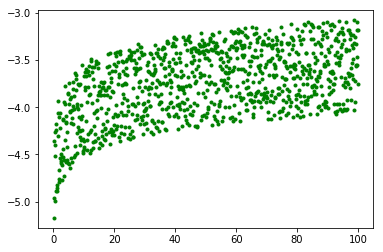

In [3]:
plt.plot(x, y, 'g.')

In [4]:
fit = model.fit()
y_pred = fit.predict(df['x2'])

In [5]:
fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.175
Model:                            OLS   Adj. R-squared:                  0.174
Method:                 Least Squares   F-statistic:                     211.5
Date:                Wed, 31 Jan 2018   Prob (F-statistic):           1.34e-43
Time:                        17:10:54   Log-Likelihood:                -307.03
No. Observations:                1000   AIC:                             618.1
Df Residuals:                     998   BIC:                             627.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -3.9223      0.016   -251.057      0.000      -3.953      -3.892
x2          5.074e-05   3.49e-06     14.543      0.000    4.39e-05    5.76e-05
==============================================================================
Omnibus:                       32.908   Durbin-Watson:                   1.742
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               24.962
Skew:                          -0.292   Prob(JB):                     3.80e-06
Kurtosis:                       2.492   Cond. No.                     6.72e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.72e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

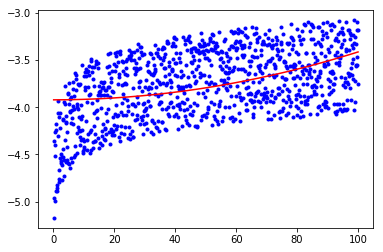

In [6]:
plt.plot(x,y,'b.',x,y_pred,'r')

In [49]:
df['logx'] = np.log10(df['x'])

In [50]:
model2 = smf.ols('y ~ logx',data = df)
fit2 = model2.fit()

In [51]:
y_pred2 = fit2.predict(df['logx'])

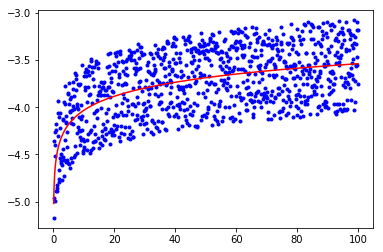

In [52]:
plt.plot(x,y,'b.',x,y_pred2,'r')

### Challenge 2


Generate (fake) data from a model of the form `B0 + B1*x + B2*x^2 + epsilon`. (You are making up the parameters.)

Split the data into a training and test set.

Fit a model to your training set. Calculate mean squared error on your training set. Then calculate it on your test set.

(You could use `sklearn.metrics.mean_squared_error`.)


In [53]:
x1 = [x/10. for x in range(1, 1001, 1)]
B2 = 2.5
y1 = [B0 + B1 * a + B2 * a**2 + random.random() for a in x1]
df2 = pd.DataFrame({'x1':x1,'y1':y1})
df2['x2'] = df2['x1'] ** 2

In [54]:
from sklearn.cross_validation import train_test_split
from sklearn.linear_model import LinearRegression
X_train, X_test, y_train, y_test = train_test_split(df2[['x1','x2']],y1,test_size = .3)

In [55]:
import statsmodels.api as sm
model2 = sm.OLS(y_train,X_train)

In [56]:
fit2 = model2.fit()

In [57]:
fit2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 1.622e+10
Date:                Wed, 31 Jan 2018   Prob (F-statistic):               0.00
Time:                        19:07:31   Log-Likelihood:                -1313.1
No. Observations:                 700   AIC:                             2630.
Df Residuals:                     698   BIC:                             2639.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.2858      0.004     68.473      0.000       0.278       0.294
x2             2.5016   5.44e-05    4.6e+04      0.000       2.501       2.502
==============================================================================
Omnibus:                       78.799   Durbin-Watson:                   1.596
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              105.183
Skew:                          -0.949   Prob(JB):                     1.44e-23
Kurtosis:                       3.028   Cond. No.                         300.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [58]:
y_pred_train = fit2.predict(X_train)

In [59]:
from sklearn.metrics import mean_squared_error
mse_test = mean_squared_error(y_train,y_pred_train)

In [60]:
mse_test

2.4941861115820076

In [61]:
y_pred_ts = fit2.predict(X_test)

In [62]:
mse_test2 = mean_squared_error(y_test,y_pred_ts)

In [63]:
mse_test2

1.8679365274394315

### Challenge 3

In [64]:
code'''
For the data from two (above), try polynomial fits from 0th (just constant) to 7th order (highest term x^7). 
Over the x axis of model degree (8 points), plot:

 * training error
 * test error
 * R squared
 * AIC'''

'\nFor the data from two (above), try polynomial fits from 0th (just constant) to 7th order (highest term x^7). \nOver the x axis of model degree (8 points), plot:\n\n * training error\n * test error\n * R squared\n * AIC'

In [65]:
def getPolynomial(dataframe,order):
    for i in range(order+1):
        colname = 'x' + str(i)
        dataframe[colname] = dataframe['x'] ** i
    print(dataframe)

,x,y,x2,logx
0,0.1,-4.725090,0.01,-1.000000
1,0.2,-5.118651,0.04,-0.698970
2,0.3,-4.350812,0.09,-0.522879
3,0.4,-4.849928,0.16,-0.397940
4,0.5,-4.908490,0.25,-0.301030


In [66]:
getPolynomial(df,8)

         x         y        x2      logx   x0     x1           x3  \
0      0.1 -5.173386      0.01 -1.000000  1.0    0.1        0.001   
1      0.2 -4.362855      0.04 -0.698970  1.0    0.2        0.008   
2      0.3 -4.961308      0.09 -0.522879  1.0    0.3        0.027   
3      0.4 -4.399903      0.16 -0.397940  1.0    0.4        0.064   
4      0.5 -4.990785      0.25 -0.301030  1.0    0.5        0.125   
5      0.6 -4.267871      0.36 -0.221849  1.0    0.6        0.216   
6      0.7 -4.518444      0.49 -0.154902  1.0    0.7        0.343   
7      0.8 -4.246600      0.64 -0.096910  1.0    0.8        0.512   
8      0.9 -4.178375      0.81 -0.045757  1.0    0.9        0.729   
9      1.0 -4.886005      1.00  0.000000  1.0    1.0        1.000   
10     1.1 -4.891215      1.21  0.041393  1.0    1.1        1.331   
11     1.2 -4.860879      1.44  0.079181  1.0    1.2        1.728   
12     1.3 -4.819331      1.69  0.113943  1.0    1.3        2.197   
13     1.4 -4.059711      1.96  0.

In [67]:
x3 = df[['x0','x1','x2','x3','x4','x5','x6','x7','x8']]

In [68]:
X_train, X_test, y_train, y_test = train_test_split(x3,y,test_size = .3)

In [69]:
model3 = sm.OLS(y_train,X_train)
fit3 = model3.fit()

In [70]:
y_pred_train = fit3.predict(X_train)

In [71]:
train_error = mean_squared_error(y_train,y_pred_train)

In [72]:
train_error

1.0278907476979315

In [34]:
y_pred_test = fit3.predict(X_test)

In [35]:
test_error = mean_squared_error(y_test,y_pred_test)

In [36]:
test_error

0.97519373434415191

In [37]:
fit3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                      -7.153
Model:                            OLS   Adj. R-squared:                 -7.224
Method:                 Least Squares   F-statistic:                    -101.3
Date:                Wed, 31 Jan 2018   Prob (F-statistic):               1.00
Time:                        17:12:18   Log-Likelihood:                -1011.1
No. Observations:                 700   AIC:                             2036.
Df Residuals:                     693   BIC:                             2068.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x0            -0.0028      0.000    -26.852      0.000      -0.003      -0.003
x1            -0.0202      0.001    -26.867      0.000      -0.022      -0.019
x2            -0.1041      0.004    -26.912      0.000      -0.112      -0.097
x3             0.0102      0.000     21.468      0.000       0.009       0.011
x4            -0.0004   2.29e-05    -18.373      0.000      -0.000      -0.000
x5          9.037e-06   5.54e-07     16.305      0.000    7.95e-06    1.01e-05
x6         -1.063e-07   7.19e-09    -14.797      0.000    -1.2e-07   -9.22e-08
x7          6.499e-10   4.77e-11     13.633      0.000    5.56e-10    7.43e-10
x8         -1.614e-12   1.27e-13    -12.699      0.000   -1.86e-12   -1.36e-12
==============================================================================
Omnibus:                      374.834   Durbin-Watson:                   1.779
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2159.659
Skew:                          -2.447   Prob(JB):                         0.00
Kurtosis:                      10.078   Cond. No.                     2.51e+16
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.51e+16. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### Challenge 4

In [ ]:
##### Challenge 4
'''
For the data from two (above), fit a model to only the first 5 of your data points (m=5). Then to first 10 (m=10). 
Then to first 15 (m=15). In this manner, keep fitting until you fit your entire training set. 
For each step, calculate the training error and the test error. Plot both (in the same plot) over m. 
This is called a learning curve.
'''


In [73]:
#Create a function that will input different number of data points

def graphCurve(df,m):
    df1 = df[:m]
    model = sm.OLS(df1.y1,df1.drop(['y1'],1))
    fit = model.fit()
    X_train, X_test, y_train, y_test = train_test_split(df1.drop(['y1'],1),df1.y1,test_size = .3)
    y_pred_train = fit.predict(X_train)
    train_error = mean_squared_error(y_train,y_pred_train)
    y_pred_test = fit.predict(X_test)
    test_error = mean_squared_error(y_test,y_pred_test)
    return train_error,test_error

In [74]:
train = []
test = []
m = range(5,120,5)
for i in range(5,120,5):
    error_list = [graphCurve(df2, i) for i in m]
for i in error_list:
    train.append(i[0])
    test.append(i[1])
    

In [75]:
test

[0.1854919346336244,
 3.1514157599814081,
 2.6062799634585434,
 1.1972679327688336,
 3.9020116148824564,
 1.9378844880699246,
 0.6253348753861746,
 1.6897214768206565,
 3.5105115607767172,
 1.5455237574259075,
 1.9845837039208201,
 1.2488187842704721,
 2.5529848701587659,
 2.8233868927240358,
 2.8628722159934092,
 1.6959464130547388,
 1.5302442433821111,
 1.5486171443356167,
 3.3055806185423289,
 2.3537074779510965,
 2.2873196295443563,
 3.0474393815659315,
 2.9452038125701541]

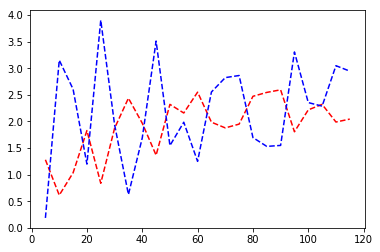

In [76]:
plt.plot(m,train,'r--')
plt.plot(m,test,'b--')

In [77]:
df2.shape

(1000, 3)

In [83]:
model4_5 = sm.OLS(df4.y1,df4[['x1','x2']])

NameError: name 'df4' is not defined

**CS: Things stop working at this point. Looks like maybe you ran out of time? I like that you separated functionality into functions instead of just inlining everything.

In [84]:
fit4_5 = model4_5.fit()

In [82]:
X_train, X_test, y_train, y_test = train_test_split(df4[['x1','x2']],df4.y1,test_size = .3)

NameError: name 'df4' is not defined

In [262]:
y_pred_train = fit4_5.predict(X_train)

In [263]:
train_error = mean_squared_error(y_train,y_pred_train)

1   -3.962765
2   -4.287273
0   -4.786959
Name: y1, dtype: float64

In [268]:
train_error

1.7352143838655631

In [265]:
y_pred_test = fit4_5.predict(X_test)

In [266]:
test_error = mean_squared_error(y_test,y_pred_test)

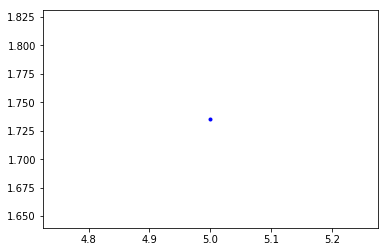

In [267]:
plt.plot(m,train_error,'b.')